In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Increase graph quality
mpl.rcParams['figure.dpi']= 600
mpl.rcParams["figure.figsize"] = (12,8)
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
df1 = pd.read_csv('results/known_data/2-kws_naive_cks_known_data-05-80-percent.csv', sep=';')
df1.loc[df1['Percentage known'].isin([np.arange(.05, 0.6, .05)])]
df2 = pd.read_csv('results/known_data/2-kws_naive_cks_known_data-from-60-percent.csv', sep=';')

df = pd.concat([df1, df2])

df.tail()

,Percentage known,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc,Refinement acc
795,0.95,30109,90,600,10,0.984746,0.984746
796,0.95,30109,90,600,10,1.000000,1.000000
797,0.95,30109,90,600,10,1.000000,1.000000
798,0.95,30109,90,600,10,1.000000,1.000000
799,0.95,30109,90,600,10,1.000000,1.000000


In [3]:
df1_130 = pd.read_csv('results/known_data/2-kws_naive_cks_known_data-05-55_130.csv', sep=';')
df2_130 = pd.read_csv('results/known_data/2-kws_naive_cks_known_data-60-80_130.csv', sep=';')

df1_130.loc[len(df1_130.index)] = [0.5, 30109, 130, 1257, 0, 0, 0]
df1_130.loc[len(df1_130.index)] = [0.55, 30109, 130, 1257, 0, 0, 0]
# df1_130.loc[len(df1_130.index)] = [0.5, 30109, 130, 1257, 0, 0, 0]

df_130 = pd.concat([df1_130, df2_130])

# remove last row
df_130 = df_130[:-1]

df_130.tail()

,Percentage known,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc,Refinement acc
495,0.8,30109.0,130.0,1257.0,10.0,0.924619,0.982358
496,0.8,30109.0,130.0,1257.0,10.0,0.939054,0.965517
497,0.8,30109.0,130.0,1257.0,10.0,0.943063,0.979952
498,0.8,30109.0,130.0,1257.0,10.0,0.934242,0.981556
499,0.8,30109.0,130.0,1257.0,10.0,0.934242,0.969527


In [4]:
df_5_known_queries = df.loc[df['Nb queries known'] == 5]
df_10_known_queries = df.loc[df['Nb queries known'] == 10]

df_10_known_queries.head()


,Percentage known,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc,Refinement acc
50,0.05,30109,90,600,10,0.018644,0.033898
51,0.05,30109,90,600,10,0.069492,0.210169
52,0.05,30109,90,600,10,0.033898,0.062712
53,0.05,30109,90,600,10,0.049153,0.137288
54,0.05,30109,90,600,10,0.040678,0.062712


In [5]:
df_130_5_known_queries = df_130.loc[df_130['Nb queries known'] == 5]
df_130_10_known_queries = df_130.loc[df_130['Nb queries known'] == 10]

df_130_10_known_queries.head()

,Percentage known,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc,Refinement acc
50,0.05,30109.0,130.0,1257.0,10.0,0.016038,0.027265
51,0.05,30109.0,130.0,1257.0,10.0,0.019246,0.064154
52,0.05,30109.0,130.0,1257.0,10.0,0.015237,0.072173
53,0.05,30109.0,130.0,1257.0,10.0,0.015237,0.031275
54,0.05,30109.0,130.0,1257.0,10.0,0.032879,0.038492


In [6]:
df_5_base_acc = df_5_known_queries.groupby('Percentage known')['Base acc'].mean()
df_5_base_min = df_5_known_queries.groupby('Percentage known')['Base acc'].min()
df_5_base_max = df_5_known_queries.groupby('Percentage known')['Base acc'].max()

df_10_base_acc = df_10_known_queries.groupby('Percentage known')['Base acc'].mean()
df_10_base_min = df_10_known_queries.groupby('Percentage known')['Base acc'].min()
df_10_base_max = df_10_known_queries.groupby('Percentage known')['Base acc'].max()

df_5_refined_acc = df_5_known_queries.groupby('Percentage known')['Refinement acc'].mean()
df_5_refined_min = df_5_known_queries.groupby('Percentage known')['Refinement acc'].min()
df_5_refined_max = df_5_known_queries.groupby('Percentage known')['Refinement acc'].max()

df_10_refined_acc = df_10_known_queries.groupby('Percentage known')['Refinement acc'].mean()
df_10_refined_min = df_10_known_queries.groupby('Percentage known')['Refinement acc'].min()
df_10_refined_max = df_10_known_queries.groupby('Percentage known')['Refinement acc'].max()

In [7]:
df_130_5_base_acc = df_130_5_known_queries.groupby('Percentage known')['Base acc'].mean()
df_130_5_base_min = df_130_5_known_queries.groupby('Percentage known')['Base acc'].min()
df_130_5_base_max = df_130_5_known_queries.groupby('Percentage known')['Base acc'].max()
df_130_10_base_acc = df_130_10_known_queries.groupby('Percentage known')['Base acc'].mean()
df_130_10_base_min = df_130_10_known_queries.groupby('Percentage known')['Base acc'].min()
df_130_10_base_max = df_130_10_known_queries.groupby('Percentage known')['Base acc'].max()
df_130_5_refined_acc = df_130_5_known_queries.groupby('Percentage known')['Refinement acc'].mean()
df_130_5_refined_min = df_130_5_known_queries.groupby('Percentage known')['Refinement acc'].min()
df_130_5_refined_max = df_130_5_known_queries.groupby('Percentage known')['Refinement acc'].max()
df_130_10_refined_acc = df_130_10_known_queries.groupby('Percentage known')['Refinement acc'].mean()
df_130_10_refined_min = df_130_10_known_queries.groupby('Percentage known')['Refinement acc'].min()
df_130_10_refined_max = df_130_10_known_queries.groupby('Percentage known')['Refinement acc'].max()

In [8]:
df_5_base_acc.tail()

Percentage known
0.80    0.698353
0.80    0.706050
0.85    0.791630
0.90    0.879832
0.95    0.955563
Name: Base acc, dtype: float64

In [9]:
df_5_refined_acc.head()

Percentage known
0.05    0.018319
0.10    0.119563
0.15    0.269714
0.20    0.489882
0.25    0.639630
Name: Refinement acc, dtype: float64

In [10]:
df_130_10_refined_acc.head()

Percentage known
0.05    0.030361
0.10    0.269719
0.15    0.653569
0.20    0.837674
0.25    0.894178
Name: Refinement acc, dtype: float64

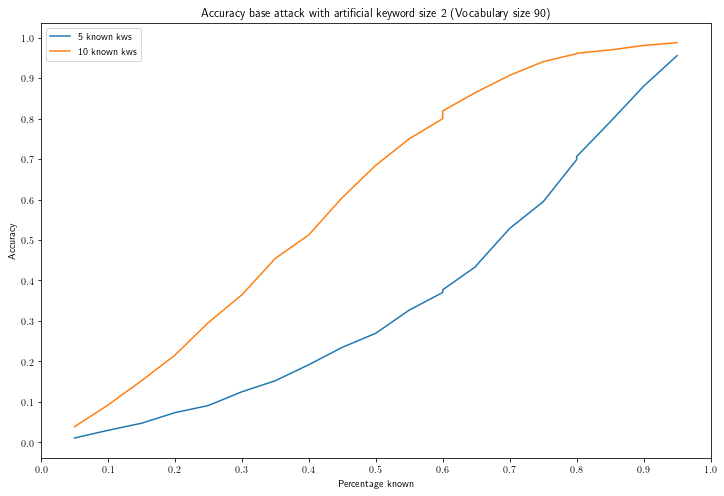

In [11]:
xs = np.arange(.05, 1, .05)

plt.rcParams['figure.figsize'] = [12, 8]
mpl.rc('text', usetex = True)

plt.plot(df_5_base_acc, label="5 known kws")
# plt.fill_between(x=xs, y1=df_5_base_min, y2=df_5_base_max, alpha=0.5)

plt.plot(df_10_base_acc, label="10 known kws")
# plt.fill_between(x=xs, y1=df_15_base_min, y2=df_10_base_max, alpha=0.5)

plt.title("Accuracy base attack with artificial keyword size 2 (Vocabulary size 90)")
plt.ylabel("Accuracy")
plt.xlabel("Percentage known")

plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, 1.1, step=0.1))
# plt.ylim(top=1.05, bottom=0.35)

plt.legend()
plt.show()

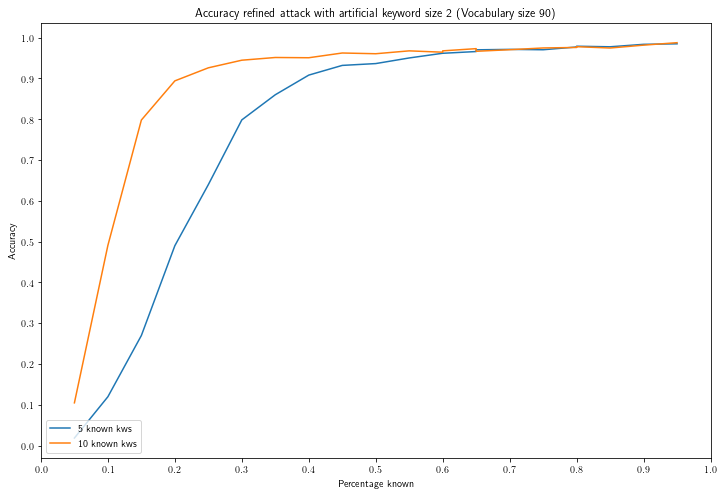

Percentage known
0.05    0.018319
0.10    0.119563
0.15    0.269714
0.20    0.489882
0.25    0.639630
0.30    0.798353
0.35    0.860000
0.40    0.908168
0.45    0.931966
0.50    0.936437
0.55    0.950218
0.60    0.961748
0.60    0.961681
0.65    0.965950
0.65    0.970151
0.70    0.971261
0.75    0.970336
0.80    0.977143
0.80    0.978992
0.85    0.977613
0.90    0.983630
0.95    0.984908
Name: Refinement acc, dtype: float64
Percentage known
0.05    0.104610
0.10    0.490746
0.15    0.798000
0.20    0.894034
0.25    0.926034
0.30    0.944712
0.35    0.951356
0.40    0.950746
0.45    0.962373
0.50    0.960576
0.55    0.967627
0.60    0.964339
0.60    0.967627
0.65    0.973051
0.65    0.966576
0.70    0.970441
0.75    0.974729
0.80    0.975951
0.80    0.977864
0.85    0.974610
0.90    0.981627
0.95    0.987661
Name: Refinement acc, dtype: float64


In [12]:
xs = np.arange(.05, 1, .05)

plt.plot(df_5_refined_acc, label="5 known kws")
# plt.fill_between(x=xs_comb, y1=df_5_refined_min, y2=df_5_refined_max, alpha=0.5)

plt.plot(df_10_refined_acc, label="10 known kws")
# plt.fill_between(x=xs_comb, y1=df_10_refined_min, y2=df_10_refined_max, alpha=0.5)

plt.title("Accuracy refined attack with artificial keyword size 2 (Vocabulary size 90)")
plt.ylabel("Accuracy")
plt.xlabel("Percentage known")

plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, 1.1, step=0.1))
# plt.ylim(top=1.05, bottom=0.35)

plt.legend(loc='lower left')
plt.show()

xs = np.arange(.05, 1, .05)

print(df_5_refined_acc)
print(df_10_refined_acc)

# print(xs)
# print(df_5_refined_acc)

# plt.plot(df_5_refined_acc, label="5 known kws")
# plt.fill_between(x=xs, y1=df_5_refined_min, y2=df_5_refined_max, alpha=0.5)

# plt.plot(df_10_refined_acc, label="10 known kws")
# plt.fill_between(x=xs, y1=df_10_refined_min, y2=df_10_refined_max, alpha=0.5)

# plt.title("Accuracy refined attack with artificial keyword size 2")
# plt.ylabel("Accuracy")
# plt.xlabel("Percentage known")

# plt.yticks(np.arange(0, 1.1, step=0.1))
# plt.xticks(np.arange(0, 1.1, step=0.1))
# # plt.ylim(top=1.05, bottom=0.35)

# plt.legend(loc='lower left')
# plt.show()

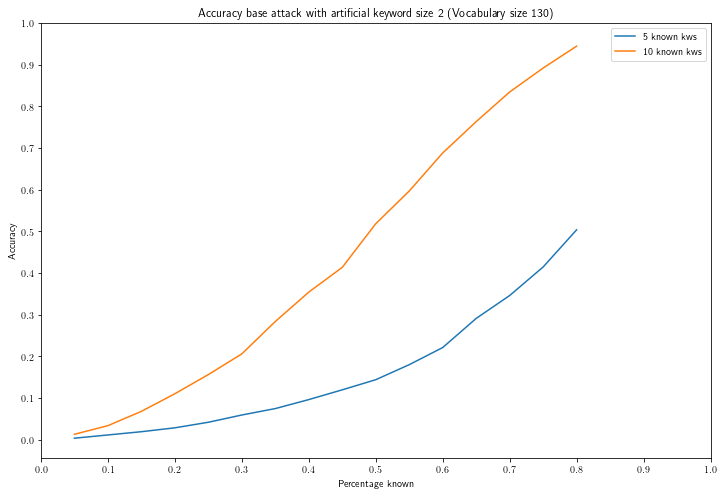

In [13]:
xs = np.arange(.05, 1, .05)

plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(df_130_5_base_acc, label="5 known kws")
# plt.fill_between(x=xs, y1=df_5_base_min, y2=df_5_base_max, alpha=0.5)

plt.plot(df_130_10_base_acc, label="10 known kws")
# plt.fill_between(x=xs, y1=df_15_base_min, y2=df_10_base_max, alpha=0.5)

plt.title("Accuracy base attack with artificial keyword size 2 (Vocabulary size 130)")
plt.ylabel("Accuracy")
plt.xlabel("Percentage known")

plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, 1.1, step=0.1))
# plt.ylim(top=1.05, bottom=0.35)

plt.legend()
plt.show()

Percentage known
0.05    0.006310
0.10    0.045895
0.15    0.137029
0.20    0.311821
0.25    0.488866
0.30    0.663083
0.35    0.747668
0.40    0.827939
0.45    0.887955
0.50    0.907396
0.55    0.928562
0.60    0.947173
0.65    0.958642
0.70    0.963930
0.75    0.968450
0.80    0.973498
Name: Refinement acc, dtype: float64
Percentage known
0.05    0.030361
0.10    0.269719
0.15    0.653569
0.20    0.837674
0.25    0.894178
0.30    0.920080
0.35    0.944988
0.40    0.951612
0.45    0.956375
0.50    0.961732
0.55    0.964876
0.60    0.964860
0.65    0.969158
0.70    0.972141
0.75    0.978412
0.80    0.981171
Name: Refinement acc, dtype: float64


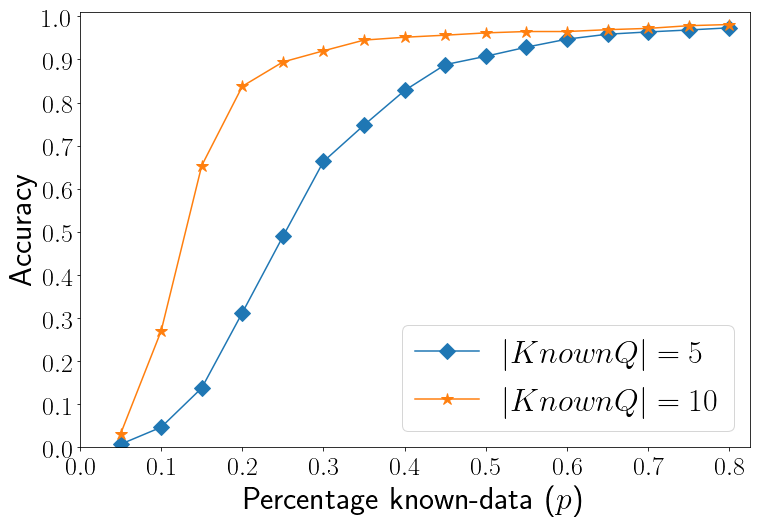

In [14]:
xs = np.arange(.05, 1, .05)

print(df_130_5_refined_acc)
print(df_130_10_refined_acc)

plt.plot(df_130_5_refined_acc, label="$|KnownQ| = 5$", marker='D', markersize=12)
# plt.fill_between(x=xs_comb, y1=df_5_refined_min, y2=df_5_refined_max, alpha=0.5)

plt.plot(df_130_10_refined_acc, label="$|KnownQ| = 10$", marker='*', markersize=12)
# plt.fill_between(x=xs_comb, y1=df_10_refined_min, y2=df_10_refined_max, alpha=0.5)

# plt.title("Accuracy refined attack with artificial keyword size 2 (Vocabulary size 130)")
plt.ylabel("Accuracy", fontsize=32)
plt.xlabel("Percentage known-data ($p$)", fontsize=32)

plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=26)
plt.xticks(np.arange(0, 1.1, step=0.1), fontsize=26)
# plt.ylim(top=1.05, bottom=0.35)

plt.legend(loc='lower right', fontsize=32)

# plt.yticks(np.arange(0, 1.1, step=0.1))
# plt.xticks(fontsize=26)

plt.ylim(top=1.01, bottom=0.0)
plt.xlim(left=0.0, right=0.825)

plt.savefig('refined-score-known-data.eps', format='eps')


plt.show()

xs = np.arange(.05, 1, .05)